# Visualize common GCAM and Demeter run data


## Load packages

**NOTE**:  You need to install `im3vis` which is the package in this repo.  You can do this by running:

```py
python setup.py install
``` 
from the directory you cloned `im3vis` to.

In [1]:
%matplotlib inline

import os
import pkg_resources

import im3vis
import pandas as pd
import geopandas as gpd
import seaborn as sns; sns.set()

## Setup paths to data and other info

In [2]:
# target year you wish to examine
target_year = '2015'

# demeter's GCAM projected land allocation file
gcam_projected_file = pkg_resources.resource_filename('im3vis', 'data/gcam_ref_scenario_reg32_basin235_v5p1p3.csv')

# demeter output file for the target year
demeter_lc_file = pkg_resources.resource_filename('im3vis', f"data/landcover_{target_year}_timestep.csv")

# bounary shapefile for the CONUS loaded as a geopandas dataframe
conus_boundary_gdf = gpd.read_file(pkg_resources.resource_filename('im3vis', "data/ne_50m_conus.shp"))

# a Pandas data frame of GCAM's projected land allocation data
gcam_df = pd.read_csv(gcam_projected_file)

# a geopandas data frame of demeter's output land allocation data with geometry
demeter_gdf = im3vis.build_geodataframe(demeter_lc_file)


## GCAM total land allocation by region for all land classes

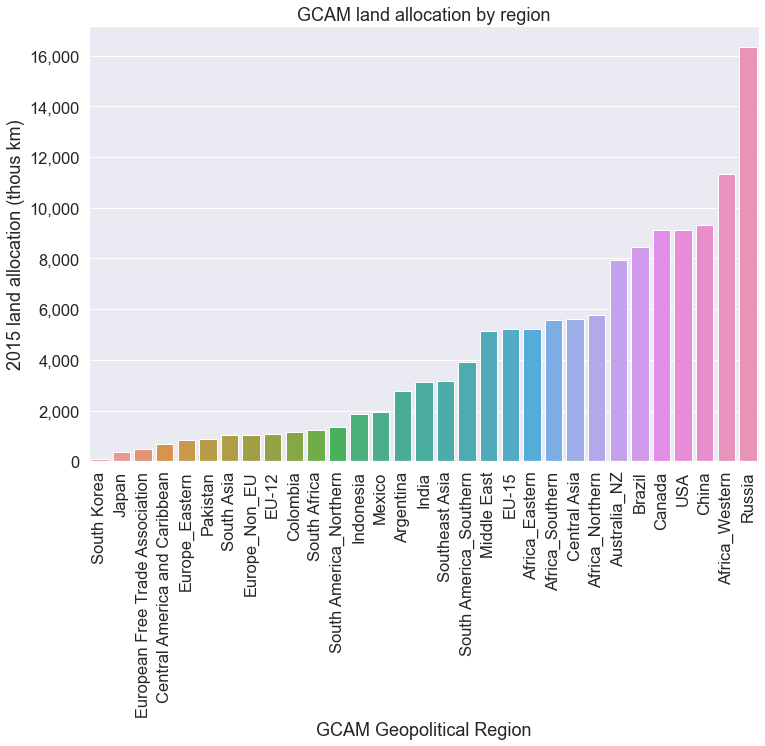

In [3]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year)

## GCAM total land allocation by region for combined Corn and Wheat

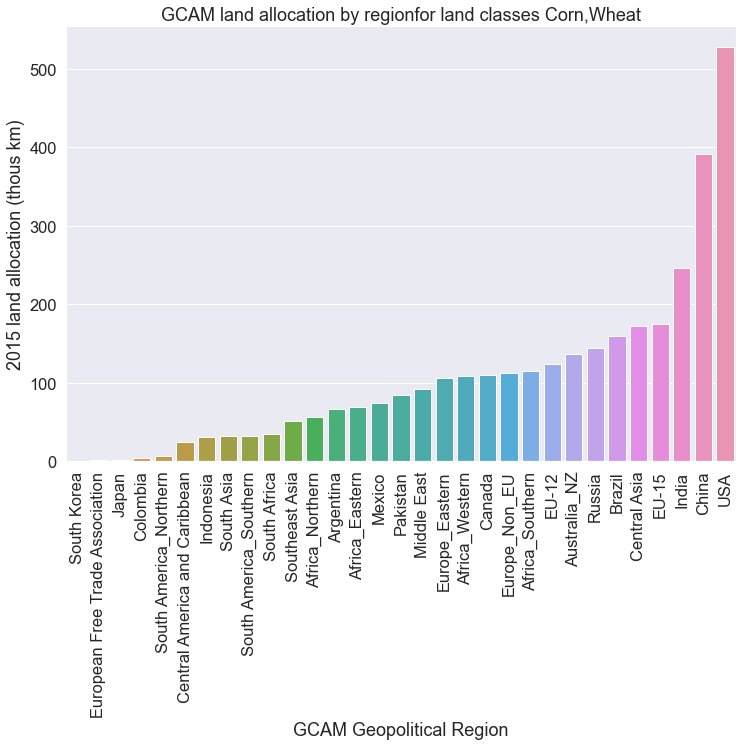

In [4]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year, landclass_list=['Corn', 'Wheat'])

## GCAM allocation of `crops` from 2015 through 2100 in the USA binned by Demeter crop types


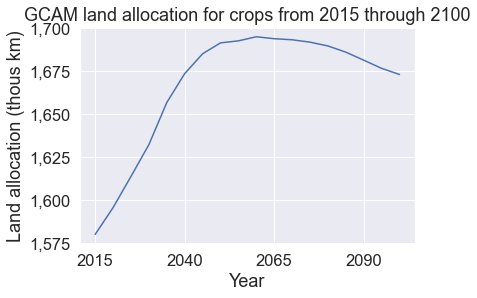

In [5]:
grp = im3vis.plot_gcam_reclassified(gcam_df, landclass='crops', start_yr=2015)

## GCAM `forest` allocation for year 2015 for the CONUS

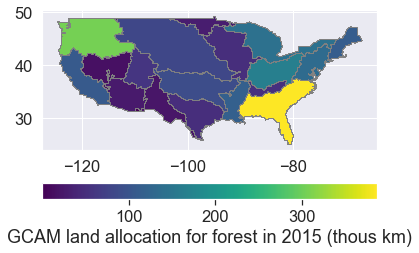

In [6]:
agg_df = im3vis.plot_gcam_conus_basin(gcam_df, target_year, landclass='forest')


## Demeter `forest` output for year 2015 for the CONUS

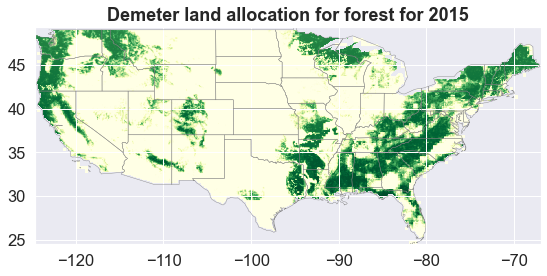

In [7]:
r = im3vis.plot_conus_raster(conus_boundary_gdf, demeter_gdf, landclass='forest', target_year=target_year)
